<h2> Дужик Валерий, C1207</h2>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import random, shuffle

<h3> Task 1</h3>

In [17]:
class TopNKeeper:
    def __init__(self, N):
        self._data = []
        self._N = N 

    def finalize(self): #O(NlogN), но в задании и не просят искать медиану 
        self._data.sort(key = lambda wv : wv[0])
        self._data = self._data[:self._N]

    def put(self, weight, value):
        if len(self._data) > 2 * self._N:
            self.finalize()
        self._data.append((weight, value))

    def get_data(self):
        self.finalize()
        return [wv[1] for wv in self._data]

def stream(n):
    stream = list(range(n))
    shuffle(stream)
    for x in stream:
        yield x
        

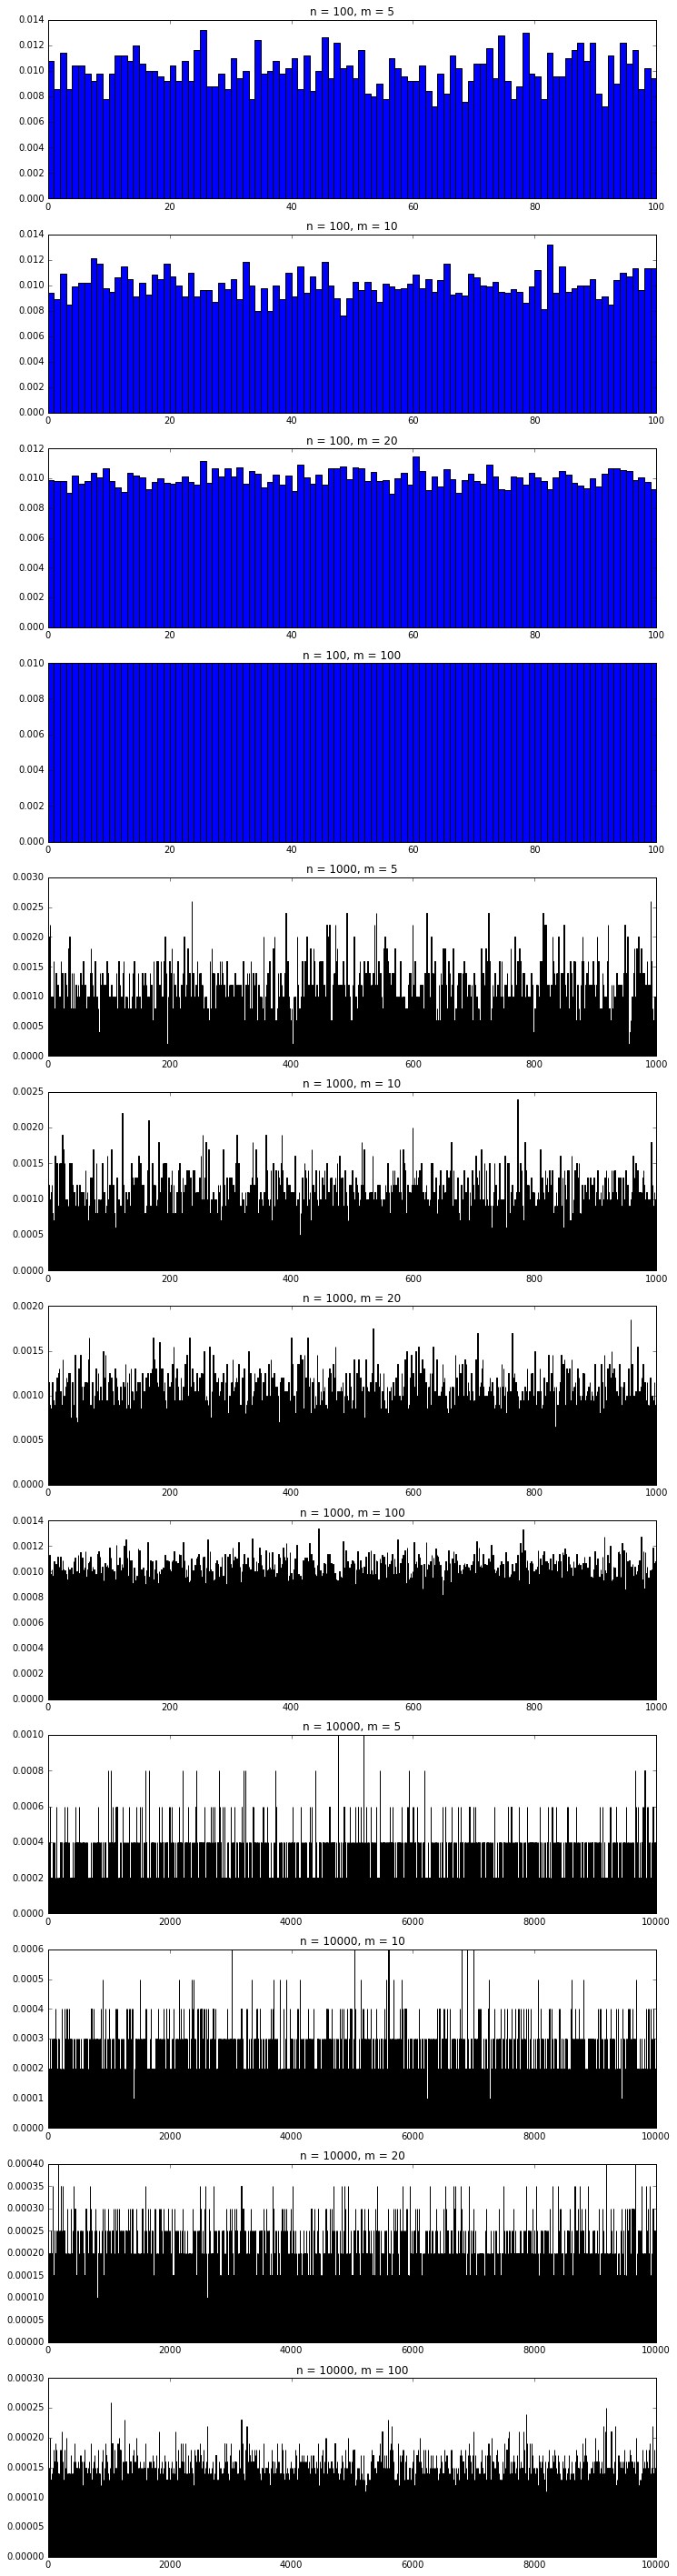

In [13]:
def test(n, m):
    keeper = TopNKeeper(m)
    
    for x in stream(n):
        keeper.put(random(), x)
        
    result = np.zeros(n).astype(int)
    for x in keeper.get_data():
        result[x] = 1
    return result

def run_experiment(n, m, K):
    hist = np.sum([test(n, m) for _ in range(K)], axis=0).astype(float) / (m * K)
    plt.title('n = {}, m = {}'.format(n, m))
    plt.bar(list(range(n)), hist, width=1)
    
    
plt.figure(figsize=(12, 50))
for i, n in enumerate([100, 1000, 10000]):
    for j, m in enumerate([5, 10, 20, 100]):
        plt.subplot(12, 1, 1 + i * 4 + j)
        run_experiment(n, m, 1000)

<h3> Task 2 </h3>

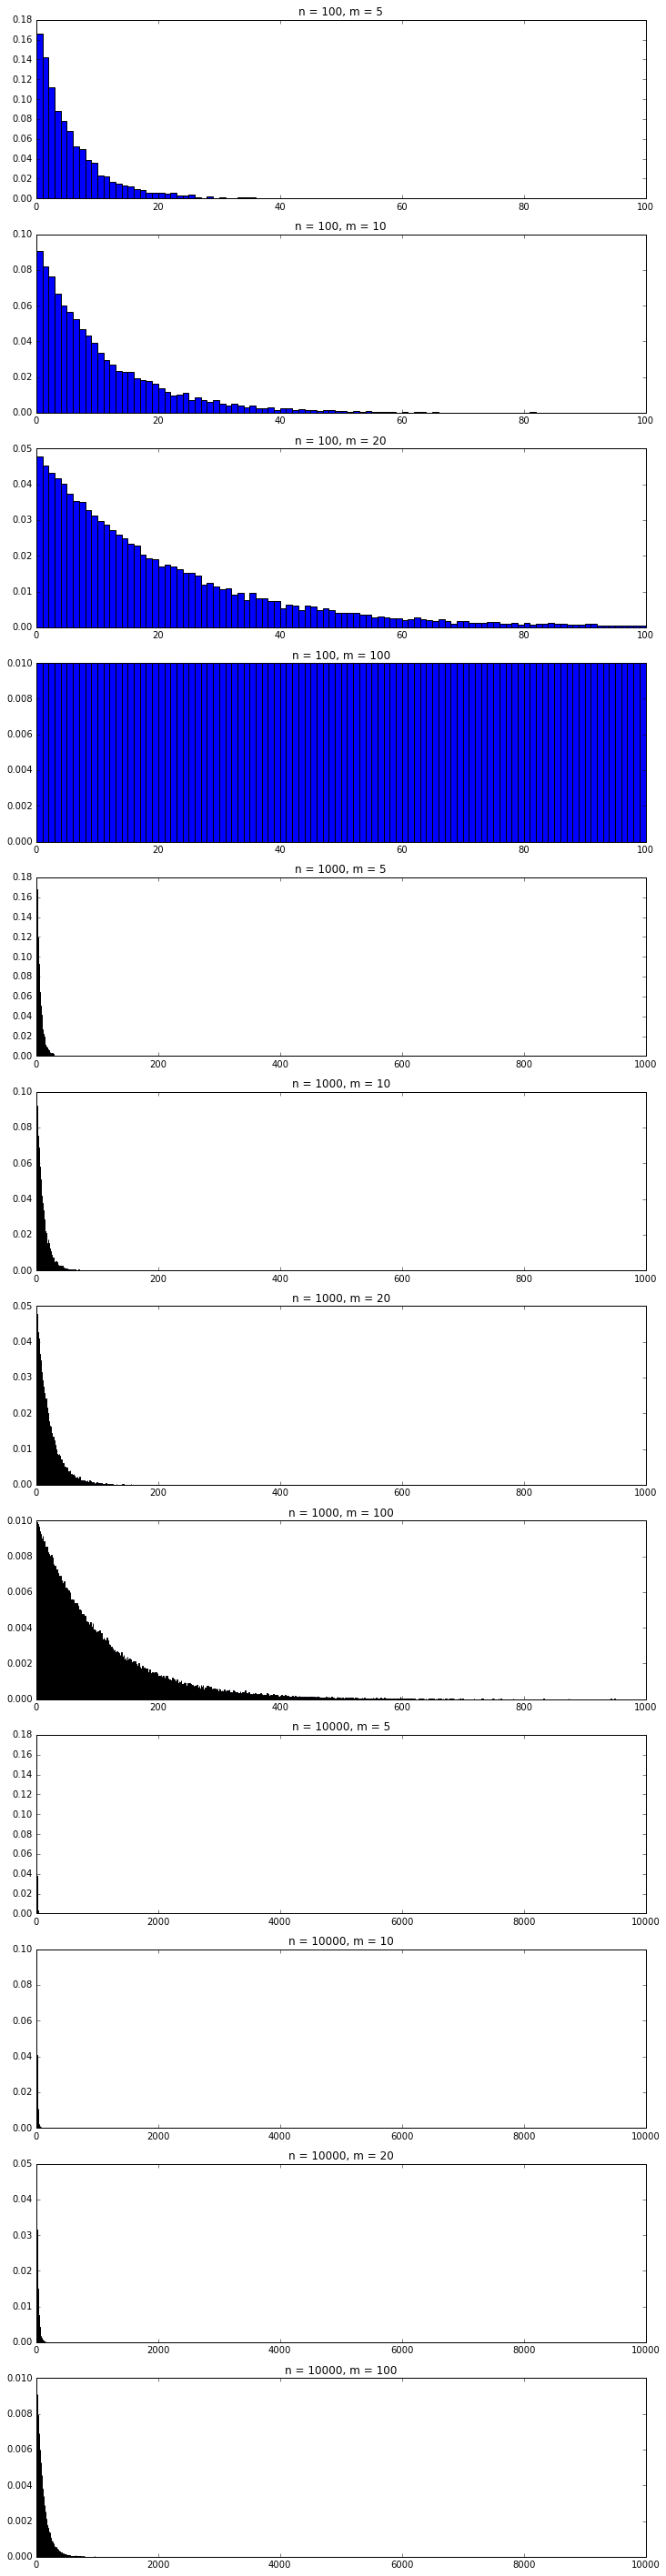

In [31]:
def test(n, m, f):
    keeper = TopNKeeper(m)
    
    for x in stream(n):
        keeper.put(random()**f(x), x)
        
    result = np.zeros(n).astype(int)
    for x in keeper.get_data():
        result[x] = 1
    return result

def run_experiment(n, m, K, f):
    hist = np.sum([test(n, m, f) for _ in range(K)], axis=0).astype(float) / (m * K)
    plt.title('n = {}, m = {}'.format(n, m))
    plt.bar(list(range(n)), hist, width=1)
    
    
plt.figure(figsize=(12, 50))
for i, n in enumerate([100, 1000, 10000]):
    for j, m in enumerate([5, 10, 20, 100]):
        plt.subplot(12, 1, 1 + i * 4 + j)
        run_experiment(n, m, 1000, lambda x : 1/(x + 1))

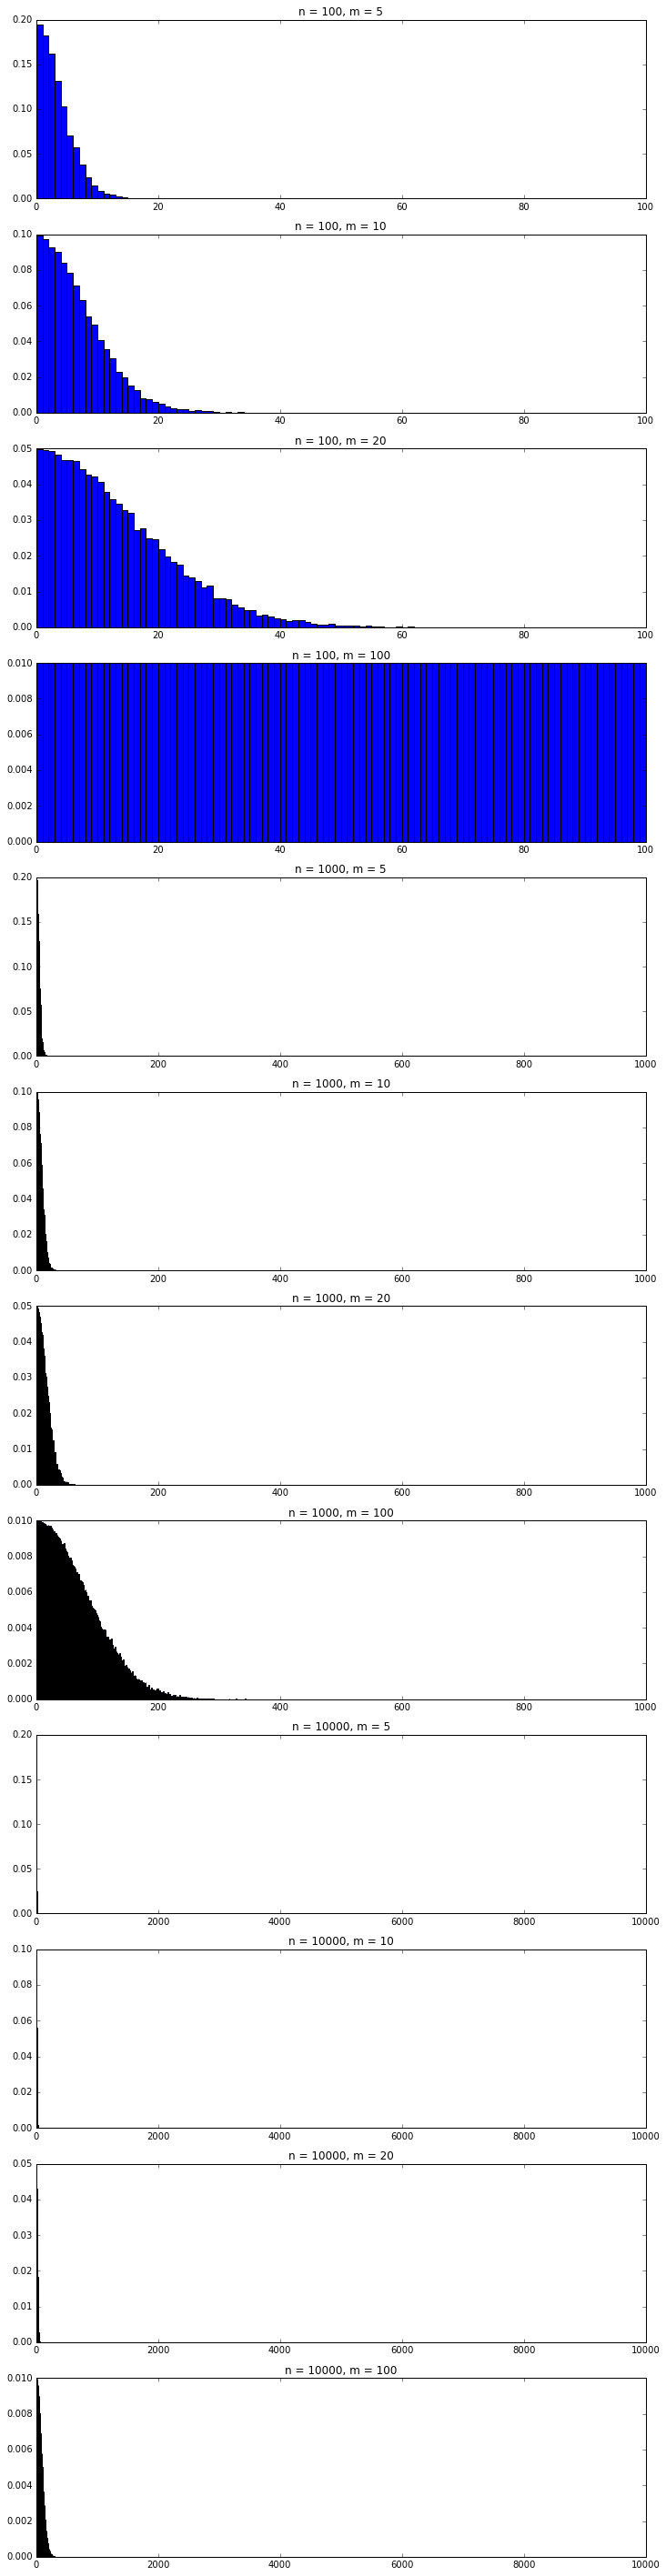

In [32]:
plt.figure(figsize=(12, 50))
for i, n in enumerate([100, 1000, 10000]):
    for j, m in enumerate([5, 10, 20, 100]):
        plt.subplot(12, 1, 1 + i * 4 + j)
        run_experiment(n, m, 1000, lambda x : 1/(x + 1)**2)